## ASSIGNMENT-3

TEAM-NAME: Team_Robusta

IDs: 2021102016, 2021102028

NAMEs: Ashish Chokhani, Umang Sharma 

### Instructions
 * Fill in the team name, id and names of all the teams members in the cell above.
 * Code must be written in Python in Jupyter Notebooks. We highly recommend using anaconda distribution or at the minimum, virtual environments for this assignment.
 * All the code and result files should be uploaded in the github classroom.
 * You can use the in-built methods and **unless explicitly mentioned**, don't need to code from scratch for this assignment. Make sure your code is modular.
 * All the representations are expected to be in a right-hand coordinate system. All the functions related to transformation matrices, quaternions, and 3D projection are expected to be coded by you.
 * You could split the Jupyter Notebook cells where TODO is written, but please try to avoid splitting/changing the structure of other cells.
 * All the visualization should be done inside the notebook unless specified otherwise.
 * Plagiarism will lead to heavy penalty.
 * Commit this notebook in the GitHub Classroom repo and any other results files under the result folder. 
 * Commits past the deadline will not be considered.
 * Extensions will be granted using the extension policy only, so please go through the policy carefully and reach out to the TAs beforehand.
 * **Download the data for section 2 and 3 from this [link](https://iiitaphyd-my.sharepoint.com/:f:/g/personal/pranjali_pathre_research_iiit_ac_in/Elm4OCxD4VhBh6f9x2ufKsgBnWwkmWc-nXPjnS5jXWRTww?e=IzOlbb)**.

In [1]:
# List the imports here
import cv2
import numpy as np
import matplotlib.pyplot as plt
import open3d as o3d
import os
import matplotlib.image as mpimg
import matplotlib.cm as cm
import copy
import glob
import pickle
import random

### SECTION 1: Epipolar lines and Epipoles

For this task, you have been given two images of the same scene taken from different view-points. You should first estimate the fundamental matrix that encodes their relative geometry from these two images.

<img src="data/1/img1.jpg" alt="image 1" width="400"/>
<img src="data/1/img2.jpg" alt="image 2" width="400"/>

Recall that given a point in one image, it's corresponding location in the other image can be found to along a line viz. the epipolar line. The task is to draw the epipolar lines in the second image for each given point in the first image. You have to repeat this for the other image as well. Draw epipolar lines on the first image for the corresponding points in the second image.

The convention used for F is $x'^{T}Fx$ where $x'$ is the location of the point in the second image. For this question you will need to compute the F matrix on your own without using inbuilt functions.

The point correspondences have been given in the folder `data/1`

In [19]:
##############################################################################
# TODO: Do tasks described in 1
##############################################################################

def get_clicked_points(image, window_name="Point Picker", debug_message=False):
    clicked_points = []  
    marked_image = image.copy()  # Create a copy to avoid altering the original image

    def handle_mouse_event(event, x, y, flags, params):
        nonlocal clicked_points
        nonlocal marked_image

        if event == cv2.EVENT_LBUTTONUP:
            if debug_message is True or isinstance(debug_message, str):
                message = f"Clicked on point (x, y): {x}, {y}"
                if isinstance(debug_message, str):
                    message = debug_message + message
                print(message)

            clicked_points.append([x, y])

            color = tuple(map(int, np.random.randint(0, 255, 3)))
            cv2.circle(marked_image, (x, y), 10, color, -1)
            cv2.putText(marked_image, f"{len(clicked_points)}", (x, y - 15),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2, cv2.LINE_AA)

    cv2.namedWindow(window_name, cv2.WINDOW_NORMAL)
    cv2.resizeWindow(window_name, 800, 500) 
    cv2.setMouseCallback(window_name, handle_mouse_event)

    while True:
        cv2.imshow(window_name, marked_image)
        key = cv2.waitKey(1)

        # Break the loop if 'q' is pressed
        if key == ord('q'):
            break

    cv2.destroyWindow(window_name)
    
    return clicked_points, marked_image

use_backup_files = True
##############################################################################
# END OF YOUR CODE
##############################################################################

In [20]:
img1_filename = "./data/1/img1.jpg"
img2_filename = "./data/1/img2.jpg"

# Read images
img1 = cv2.imread(img1_filename)
img2 = cv2.imread(img2_filename)

In [21]:
print(f"Click points - Image 1")
img1_points, _img1 = get_clicked_points(img1, "Image 1", "\t")
img1_points = np.array(img1_points) # Image 1 points
print(f"Got {img1_points.shape[0]} points from Image 1")

Click points - Image 1


QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the 

	Clicked on point (x, y): 349, 171
	Clicked on point (x, y): 473, 189
	Clicked on point (x, y): 600, 226
	Clicked on point (x, y): 742, 249
	Clicked on point (x, y): 793, 264
	Clicked on point (x, y): 251, 285
	Clicked on point (x, y): 401, 342
	Clicked on point (x, y): 559, 321
	Clicked on point (x, y): 662, 368
	Clicked on point (x, y): 799, 408
	Clicked on point (x, y): 396, 470
	Clicked on point (x, y): 543, 466
	Clicked on point (x, y): 705, 533
	Clicked on point (x, y): 884, 527
	Clicked on point (x, y): 1004, 535
	Clicked on point (x, y): 408, 545
	Clicked on point (x, y): 540, 537
	Clicked on point (x, y): 706, 564
	Clicked on point (x, y): 855, 586
	Clicked on point (x, y): 739, 623
	Clicked on point (x, y): 559, 631
Got 21 points from Image 1


In [22]:
np.save("./results/image1-points.npy", img1_points)

if use_backup_files:
    print(f"Loading points from backup")
    img1_points = np.load("./results/image1-points.npy")
    print(f"Image 1 points are: \n{img1_points}")

Loading points from backup
Image 1 points are: 
[[ 349  171]
 [ 473  189]
 [ 600  226]
 [ 742  249]
 [ 793  264]
 [ 251  285]
 [ 401  342]
 [ 559  321]
 [ 662  368]
 [ 799  408]
 [ 396  470]
 [ 543  466]
 [ 705  533]
 [ 884  527]
 [1004  535]
 [ 408  545]
 [ 540  537]
 [ 706  564]
 [ 855  586]
 [ 739  623]
 [ 559  631]]


In [23]:
print(f"Click points for Image 2")
img2_points, _img2 = get_clicked_points(img2, "Image 2", "\t")
img2_points = np.array(img2_points) # Image 2 points
print(f"Got {img2_points.shape[0]} points from Image 2")

Click points for Image 2


QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the object's thread (0x7998a20).
Cannot move to target thread (0x201d0bc0)

QObject::moveToThread: Current thread (0x201d0bc0) is not the 

	Clicked on point (x, y): 99, 321
	Clicked on point (x, y): 287, 303
	Clicked on point (x, y): 390, 284
	Clicked on point (x, y): 181, 308
	Clicked on point (x, y): 486, 311
	Clicked on point (x, y): 674, 257
	Clicked on point (x, y): 819, 277
	Clicked on point (x, y): 922, 271
	Clicked on point (x, y): 140, 362
	Clicked on point (x, y): 277, 372
	Clicked on point (x, y): 403, 373
	Clicked on point (x, y): 591, 368
	Clicked on point (x, y): 768, 390
	Clicked on point (x, y): 891, 393
	Clicked on point (x, y): 179, 488
	Clicked on point (x, y): 323, 483
	Clicked on point (x, y): 488, 475
	Clicked on point (x, y): 641, 489
	Clicked on point (x, y): 757, 497
	Clicked on point (x, y): 883, 512
Got 20 points from Image 2


In [24]:
np.save("./results/image2-points.npy", img2_points)

if use_backup_files:
    print(f"Loading points from backup")
    img2_points = np.load("./results/image2-points.npy")
    print(f"Image 2 points are: \n{img2_points}")

Loading points from backup
Image 2 points are: 
[[ 99 321]
 [287 303]
 [390 284]
 [181 308]
 [486 311]
 [674 257]
 [819 277]
 [922 271]
 [140 362]
 [277 372]
 [403 373]
 [591 368]
 [768 390]
 [891 393]
 [179 488]
 [323 483]
 [488 475]
 [641 489]
 [757 497]
 [883 512]]


In [27]:
# Choose the points (out of 20) that should be used for F (start = 1)
pts_F = [1, 2, 3, 6, 8, 14, 16]
# Indices (start = 1) to test / validate the F (solution)
pts_test_F = [5, 7, 9, 15]


# Calculate and return the Fundamental Matrix F
def calculate_fundamental_matrix(img1_points: np.ndarray, img2_points: np.ndarray):
    N = img1_points.shape[0]
    
    cim1 = np.hstack((img1_points, np.ones((N, 1))))   # First image
    cim2 = np.hstack((img2_points, np.ones((N, 1))))   # Second image
    
    aT_i = lambda i: np.hstack((
        cim2[i][0]*cim1[i].T, 
        cim2[i][1]*cim1[i].T, 
        cim2[i][2]*cim1[i].T)) 
    
    A_matrix = np.vstack([aT_i(i) for i in range(N)])
    U, D, Vh = np.linalg.svd(A_matrix) 
    
    vector_f = Vh.T[:, -1] 
    normalized_f = vector_f / vector_f[8]   
    
    reshaped_F = np.reshape(normalized_f, (3, 3), 'F')
    U_F, D_F, Vh_F = np.linalg.svd(reshaped_F)
    diagonal_D = np.diag([D_F[0], D_F[1], 0]) 
    fundamental_matrix = U_F @ diagonal_D @ Vh_F   
    
    return fundamental_matrix

In [28]:
# Get all correspondences for the task
point_indices = np.array(pts_F, int) - 1   # 0 indexing
image1_correspondences = img1_points[point_indices, :]
image2_correspondences = img2_points[point_indices, :]

# Calculate the fundamental matrix
fundamental_matrix = calculate_fundamental_matrix(image1_correspondences, image2_correspondences)

# Convert the points to Homogeneous (3, N)
image1_points_homogeneous = np.hstack((img1_points, np.ones((img1_points.shape[0], 1)))).T
image2_points_homogeneous = np.hstack((img2_points, np.ones((img2_points.shape[0], 1)))).T

for test_point_index in pts_test_F:
    i = test_point_index - 1  # Index from 0
    correspondence_distance = image1_points_homogeneous[:, i].T @ fundamental_matrix @ image2_points_homogeneous[:, i]
    print(f"Correspondence {test_point_index}: {correspondence_distance:.6f}")

print(f"Correspondences used for F: {pts_F}")

print(f"Solution for F is \n{fundamental_matrix}")
print(f"The solution for transpose (image 2 first, then image 1) is \n{fundamental_matrix.T}")


Correspondence 5: 0.057051
Correspondence 7: -0.025672
Correspondence 9: -0.033062
Correspondence 15: 0.165085
Correspondences used for F: [1, 2, 3, 6, 8, 14, 16]
Solution for F is 
[[ 1.34301580e-06  2.46129628e-06 -1.36371978e-03]
 [-1.88262623e-06  3.66190825e-06 -6.11001557e-04]
 [-4.30277629e-05 -2.77498498e-03  1.00000000e+00]]
The solution for transpose (image 2 first, then image 1) is 
[[ 1.34301580e-06 -1.88262623e-06 -4.30277629e-05]
 [ 2.46129628e-06  3.66190825e-06 -2.77498498e-03]
 [-1.36371978e-03 -6.11001557e-04  1.00000000e+00]]


In [29]:
w, v = np.linalg.eig(fundamental_matrix.T)

imin_w = np.argmin(w)   
if not np.isclose(w[imin_w], 0):
    print(f"Smallest eigenvalue is {w[imin_w]}")
ep_im1 = v[:, imin_w]   # Epipole

# Normalize it into pixel coordinates
epn_im1 = ep_im1 / ep_im1[2]
print(f"Epipole of first image: {epn_im1}")

Epipole of first image: [563.44130812 379.08895771   1.        ]


In [30]:
w, v = np.linalg.eig(fundamental_matrix)

imin_w = np.argmin(w)   
if not np.isclose(w[imin_w], 0):
    print(f"Smallest eigenvalue is {w[imin_w]}")
ep_im2 = v[:, imin_w]   # Epipole

# Normalize it into pixel coordinates
epn_im2 = ep_im2 / ep_im2[2]
print(f"Epipole of second image: {epn_im2}")

Epipole of second image: [365.37582704 354.69694576   1.        ]


In [31]:
# Pick a set of points in image 2 (out of 20, start = 1)
img2_corr_point_ind = [1, 3, 7, 16, 20]

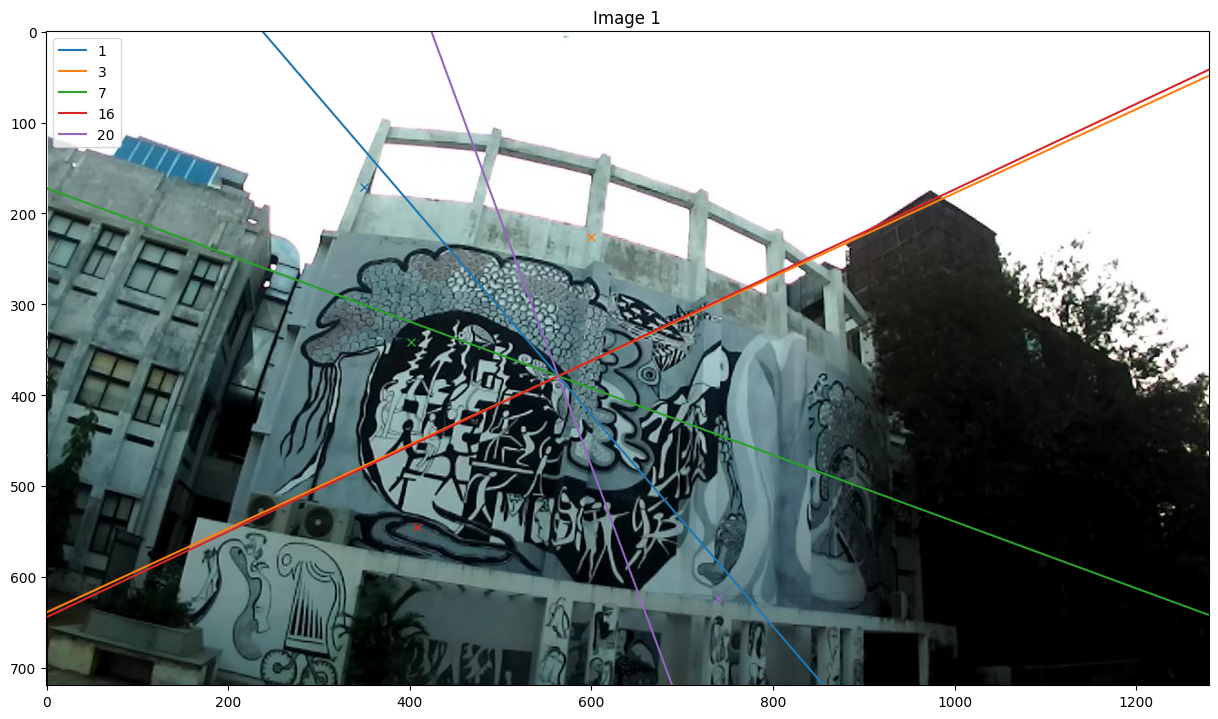

Epipole of first image at [563.44130812 379.08895771]


In [32]:
plt.figure(figsize=(15, 10))
plt.title("Image 1")
img1_plt = cv2.cvtColor(img1.copy(), cv2.COLOR_BGR2RGB)   
plt.imshow(img1_plt)
plt.autoscale(False)

x_min, x_max = 0, img1.shape[1] # Width of image
y_min, y_max = 0, img1.shape[0] # Height of image

for corr_point_index in img2_corr_point_ind:
    correspondence_index = corr_point_index - 1
    x_im2 = image2_points_homogeneous[:, correspondence_index]
    
    # Calculate the epipolar line on Image 1
    epipolar_line_im1 = fundamental_matrix @ x_im2    
    normalized_epipolar_line_im1 = epipolar_line_im1 / epipolar_line_im1[2]
    lny = lambda x: -(x * normalized_epipolar_line_im1[0] + 1) / normalized_epipolar_line_im1[1]
    
    line = plt.plot([x_min, x_max], [lny(x_min), lny(x_max)], label=f"{corr_point_index}")
    line_color = line[0].get_color()  
    
    px, py = image1_points_homogeneous[:, correspondence_index][0:2] 
    plt.plot(px, py, 'x', c=line_color, label="_nolegend_")
    
plt.legend()
plt.show()

print(f"Epipole of first image at {epn_im1[0:2]}")

In [33]:
# Pick a set of points in image 1 (out of 20, start = 1)
img1_corr_point_ind = [1, 3, 7, 20]

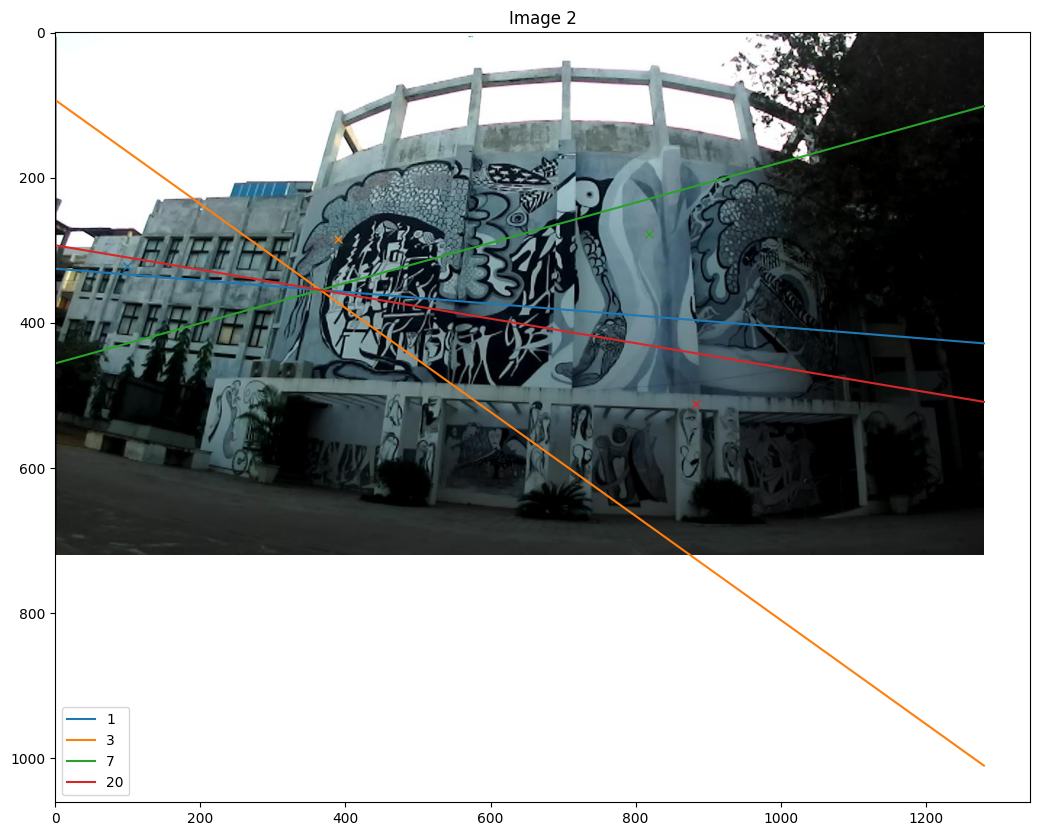

Epipole of second image at [365.37582704 354.69694576]


In [34]:
plt.figure(figsize=(15, 10))
plt.title("Image 2")
img2_plt = cv2.cvtColor(img2.copy(), cv2.COLOR_BGR2RGB)   
plt.imshow(img2_plt)

x_min, x_max = 0, img2.shape[1] # Width of image
y_min, y_max = 0, img2.shape[0] # Height of image

for corr_point_index in img1_corr_point_ind:
    correspondence_index = corr_point_index - 1
    x_im1 = image1_points_homogeneous[:, correspondence_index]
    
    # Calculate the epipolar line on Image 2
    epipolar_line_im2 = fundamental_matrix.T @ x_im1   
    normalized_epipolar_line_im2 = epipolar_line_im2 / epipolar_line_im2[2]
    lny = lambda x: -(x * normalized_epipolar_line_im2[0] + 1) / normalized_epipolar_line_im2[1]
    
    line = plt.plot([x_min, x_max], [lny(x_min), lny(x_max)], label=f"{corr_point_index}")
    line_color = line[0].get_color()  
    
    px, py = image2_points_homogeneous[:, correspondence_index][0:2] 
    plt.plot(px, py, 'x', c=line_color, label="_nolegend_")
    
plt.legend()
plt.show()

print(f"Epipole of second image at {epn_im2[0:2]}")

In [35]:
# Any tow points (in image 2)
im2_corr_points = [20, 6]    # Pick from correspondences (start = 1)
im2_p1 = image2_points_homogeneous[:, im2_corr_points[0]-1]
im2_p2 = image2_points_homogeneous[:, im2_corr_points[1]-1]

# Find the epipolar lines
el_im1_im2p1 = fundamental_matrix @ im2_p1
el1n = el_im1_im2p1 / el_im1_im2p1[2]   
el_im1_im2p2 = fundamental_matrix @ im2_p2
el2n = el_im1_im2p2 / el_im1_im2p2[2]   

l1, l2, l3, l4 = el1n[0], el1n[1], el2n[0], el2n[1]
x = (l4-l2)/(l3*l2-l4*l1)
y = -(1+l1*x)/l2
print(f"Lines intersect at (x, y): [{x}, {y}]")
print(f"Epipole actually at (x, y): [{epn_im1[0]}, {epn_im1[1]}]")
d = ((x-epn_im1[0])**2+(y-epn_im1[1])**2)**0.5
print(f"Distance is: {d}")

if d < 1e-6:    
    print("Lines appear to intersect at the correct epipole")
else:
    print("ERROR: Lines do not appear to intersect at epipole!")

Lines intersect at (x, y): [563.4413081204804, 379.08895771270835]
Epipole actually at (x, y): [563.4413081204913, 379.0889577126219]
Distance is: 8.714496564602596e-11
Lines appear to intersect at the correct epipole


In [36]:
# Any tow points (in image 1)
im1_corr_points = [17, 10]    # Pick from correspondences (start = 1)
im1_p1 = image1_points_homogeneous[:, im1_corr_points[0]-1]
im1_p2 = image1_points_homogeneous[:, im1_corr_points[1]-1]

# Find the epipolar lines
el_im2_im1p1 = fundamental_matrix.T @ im1_p1
el1n = el_im2_im1p1 / el_im2_im1p1[2]   
el_im2_im1p2 = fundamental_matrix.T @ im1_p2
el2n = el_im2_im1p2 / el_im2_im1p2[2]   

l1, l2, l3, l4 = el1n[0], el1n[1], el2n[0], el2n[1]
x = (l4-l2)/(l3*l2-l4*l1)
y = -(1+l1*x)/l2

print(f"Lines intersect at (x, y): [{x}, {y}]")
print(f"Epipole actually at (x, y): [{epn_im2[0]}, {epn_im2[1]}]")
d = ((x-epn_im2[0])**2+(y-epn_im2[1])**2)**0.5
print(f"Distance is: {d}")

if d < 1e-6:   
    print("Lines appear to intersect at the correct epipole")
else:
    print("ERROR: Lines do not appear to intersect at epipole!")

Lines intersect at (x, y): [365.37582704227304, 354.6969457628316]
Epipole actually at (x, y): [365.37582704358533, 354.69694576279045]
Distance is: 1.3129323344444065e-09
Lines appear to intersect at the correct epipole


### SECTION 2: Visual Odometry

Visual odometry is the process of recovering the egomotion (the trajectory) of an agent using only the input from the camera or a system of cameras attached to the agent. This is a well-
studied problem in robotic vision and is a critical part of many applications such as mars rovers, and self-driving cars for localization. You will be implementing a basic monocular visual odometry algorithm in this part of the assignment.

To begin with, download all the required data from `data/2`. It contains a sequence of images from the KITTI dataset. The ground truth pose of each frame (in row-major order) and the camera parameters are provided as well.

#### Procedure
The following is an overview of the entire algorithm. 
1. Find the corresponding features between frames $I_{k}$ and $I_{k-1}$.
2. Using these features correspondances, estimate the essential matrix between the two images within a RANSAC sceme.
3. Decompose the essential matrix to obtain the relative rotation $R_k$ and transition $t_k$, and form the transformation $T_k$.
4. Scale the translation $t_k$ with the absolute or the relative scale. 
5. Concatenate the relative transformation by computing $C_k$ = $C_{k-1}$ $T_k$, where $C_{k-1}$ is the previous pose of the camera in the world frame. 
6. Repeat the above steps for the remaining pairs of frames.

The main task in computing visual odometry is to compute the relative transformation $T_k$ from each pair of images $I_k$ and $I_{k-1}$ and then to concatenate these transformations to recover the full trajectory of the camera. There are two broad approaches to compute the relative motion $T_k$: Appearance-based (or direct) method, which uses the intensity information of all the pixels in the input images and feature-based method which only uses salient and repeatable features extracted and tracked across the images. You will be implementing a feature-based method. 

For every new image $I_k$, the first step consists of detecting and matching 2D features with those from the previous frame. These 2D features are the locations in the image which we can reliably find in multiple images and possibly match them. To find these features use the inbuilt SIFT OpenCV implementation. 

Refer to [OpenCV documentation](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html) for the impementation details. 

As mentioned earlier, the main task is motion computation. Using these feature correspondences, implement the 8-point algorithm for fundamental matrix estimation. Implement it inside a RANSAC scheme to get rid of any outliers, as explained in class. Then, compute the essential matrix, and decompose it to the relative R and t using ```cv2.recoverPose```. Note that the function returns the R and t of the first camera with respect to the second, and not the other way around.

Now, you might recall that the absolute scale of the translation cannot be computed from just two images. The above function only returns the direction of t, as a unit vector. Use the ground truth translation to get the absolute scale, and multiply your unit translation with this scale. Then concatenate your transformations, and repeat for the next pair of frames to recover the full absolute trajector

Deliverables:
* A .txt file containing the estimated poses, provided in the same format as the ground truth.
* A plot of the estimated trajectory along with the ground truth trajectory. Also report the obtained trajectory error. Use [EVO](https://github.com/MichaelGrupp/evo) for this.
```
pip install evo --upgrade --no-binary evo
evo_traj kitti ground-truth.txt your-result.txt -va --plot --plot_mode xz
```
* Comment on the performance of your algorithm. When does it work well or it fails and why?

In [2]:
##############################################################################
# TODO: Do tasks described in section 2
##############################################################################

Rt_GT = np.fromfile("Assign3_data/data/2/ground-truth.txt", dtype=float, count=-1, sep=" ")
Rt_GT = np.reshape(Rt_GT, (-1, 3,4))
imgs = [cv2.imread(file) for file in sorted(glob.glob("Assign3_data/data/2/images/*.png"))]

K = np.array([[7.215377000000e+02,0.000000000000e+00,6.095593000000e+02],
              [0.000000000000e+00,7.215377000000e+02,1.728540000000e+02],
              [0.000000000000e+00,0.000000000000e+00,1.000000000000e+00]])

##############################################################################
# END OF YOUR CODE
##############################################################################

<img src="8point_algo.png">

In [3]:
def normalization(pts):
    pts_av = np.mean(pts, axis=0)
    d_av = np.sum(np.linalg.norm(pts - pts_av, axis=1)) / (pts.shape[0] * np.sqrt(2))
    H = np.array([[1.0/d_av, 0, -pts_av[0]/d_av],
                  [0, 1.0/d_av, -pts_av[1]/d_av],
                  [0, 0, 1]])
    pts_h = np.hstack((pts, np.ones((pts.shape[0], 1))))
    pts_norm = (H @ pts_h.T)[:-1, :].T
    return pts_norm, H

In [4]:
def find_fundamental_matrix(pts0, pts1, p=0.9, e=0.05, s=8):
    hom_app = np.ones((pts0.shape[0], 1))
    pts0_h = np.hstack((pts0, hom_app))
    pts1_h = np.hstack((pts1, hom_app))

    F_final = np.zeros((3, 3))
    error_init = float('inf')  # Initializing with high error

    T = int(np.log(1 - p) / np.log(1 - ((1 - e) ** s)))

    for _ in range(T):
        indices = random.sample(range(pts0.shape[0]), s)
        A = np.column_stack((
            pts1[indices, 0] * pts0[indices, 0],
            pts1[indices, 0] * pts0[indices, 1],
            pts1[indices, 0],
            pts1[indices, 1] * pts0[indices, 0],
            pts1[indices, 1] * pts0[indices, 1],
            pts1[indices, 1],
            pts0[indices, 0],
            pts0[indices, 1],
            np.ones(s)
        ))

        Ua, Da, Vha = np.linalg.svd(A)
        ha = Vha[-1, :]
        F = ha.reshape(3, 3)

        Uf, Df, Vhf = np.linalg.svd(F)
        Df[2] = 0.000
        F_corrected = (Uf @ np.diag(Df) @ Vhf)[:3, :]

        error = np.mean(np.abs(np.diag(pts1_h @ F_corrected @ pts0_h.T)))

        if error < error_init:
            error_init, F_final = error, F_corrected

    return F_final, error_init


In [5]:
def calculate_fundamental_matrix(pts0, pts1):
    pts0_norm, H_0 = normalization(pts0)
    pts1_norm, H_1 = normalization(pts1)
    
    F_unnorm, error = find_fundamental_matrix(pts0_norm, pts1_norm, p=0.9, e=0.05, s=20)
    F = np.transpose(H_1) @ F_unnorm @ H_0
    E = K.T @ F @ K
    Rt = cv2.recoverPose(E, pts0, pts1, K)
    return Rt[1], Rt[2], error


In [6]:
def sift_keypoints_and_optical_flow(img1, img2, sift):
    key_points = sift.detect(img1)
    pts0 = np.array([x.pt for x in key_points], dtype=np.float32)
    
    pts1, status, _ = cv2.calcOpticalFlowPyrLK(img1, img2, pts0, None)
    status = status.reshape(status.shape[0])
    
    pts0 = pts0[status == 1]
    pts1 = pts1[status == 1]
    
    return pts0, pts1, status

In [7]:
Rs, ts, error_all = [], [], []

sift = cv2.xfeatures2d.SIFT_create()

for i in range(len(imgs) - 1):
    pts0, pts1, status = sift_keypoints_and_optical_flow(imgs[i], imgs[i + 1], sift)
    R, t, error = calculate_fundamental_matrix(pts0, pts1)
    
    Rs.append(R)
    ts.append(t)
    error_all.append(error)

error_avg = np.mean(error_all)
print(f"The average error is {error_avg}")


[ WARN:0@23.530] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


The average error is 0.00682108861608314


<img src="sol.jpeg">

In [8]:
tsRect = []

for i in range(1, len(imgs)):
    Ti_w = np.vstack((Rt_GT[i], np.array([0, 0, 0, 1])))
    Tp_w = np.vstack((Rt_GT[i-1], np.array([0, 0, 0, 1])))
    Tp_i = np.linalg.inv(Ti_w) @ Tp_w
    
    scale = np.linalg.norm(Tp_i[0:3, 3])
    tsRect.append(scale*ts[i-1])

# Generate transfomation matrices by stacking R and t

Ts = [np.eye(4)] + [np.linalg.inv(np.vstack((np.hstack((Rs[i], tsRect[i])), [0, 0, 0, 1]))) for i in range(len(Rs))]

In [9]:
with open('./vo_poses.txt', 'w') as poses:
    Tp_w = Ts[0]
    # Write 0th pose
    poses.write(" ".join(map(str, Tp_w.flatten()[:12])) + "\n")
    for Ti_p in Ts[1:]:
        Ti_w = np.dot(Tp_w, Ti_p)
        # Write ith pose
        poses.write(" ".join(map(str, Ti_w.flatten()[:12])) + "\n")

        Tp_w = Ti_w

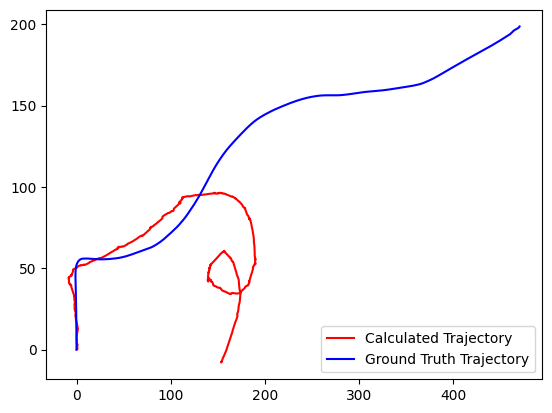

In [10]:
import matplotlib.pyplot as plt

X1, Z1 = [], []
X2, Z2 = [], []

Tp_w = Ts[0]
X1.append(Tp_w[0, 3])
Z1.append(Tp_w[2, 3])

X2.append(Rt_GT[0, 0, 3])
Z2.append(Rt_GT[0, 2, 3])

for Ti_p in Ts[1:]:
    Ti_w = np.dot(Tp_w, Ti_p)
    
    X1.append(Ti_w[0, 3])
    Z1.append(Ti_w[2, 3])
    
    X2.append(Rt_GT[len(X2), 0, 3])
    Z2.append(Rt_GT[len(Z2), 2, 3])
    
    Tp_w = Ti_w

plt.plot(X1, Z1, 'r-', label="Calculated Trajectory")
plt.plot(X2, Z2, 'b-', label="Ground Truth Trajectory")
plt.legend(loc='lower right')
plt.show()


### Initial Success:

- The algorithm performs well in the initial part of the trajectory, closely matching the ground truth.
This success may be attributed to the availability of sufficient distinctive features that can be reliably tracked using the visual odometry algorithm.
Sharp Right Turn and Divergence:

### Sharp turn
- The algorithm encounters challenges during a sharp right turn.
It is hypothesized that most of the old features might be lost during the turn, making it difficult for the algorithm to track the remaining features accurately.
- This difficulty in feature tracking adversely affects the estimation of the fundamental matrix (F), which is a critical component in visual odometry.

### Trajectory Divergence:
- Despite the divergence from the ground truth, the calculated trajectory exhibits similar turning intervals as the ground truth.
- This suggests that the algorithm is still able to capture the general pattern of the turns, even though the trajectory itself has deviated.

#### RANSAC Tuning results

**The average error is 0.006001110316292531: p=0.9, e=0.05, s=40.  
The average error is 0.005913606194329991: p=0.9, e=0.05, s=50. (imgs below corresponds to this)**

<img src="p=0.9_e=0.05_s=50.png">
<img src="p=0.95_e=0.05_s=40.png">

### EVO Results

EVO with first 300 poses aligned.

<img src="aligned_start300.png">

#### APE
<img src="APE_final.png">

#### RPE
<img src="RPE_final.png">

### SECTION 3: Stereo Dense Reconstruction

3-D point clouds are very useful in robotics for several tasks such as object detection, motion estimation (3D-3D matching or 3D-2D matching), SLAM, and other forms of scene understanding.  Stereo cameras provide  us  with  a  convenient  way  to  generate  dense  point  clouds. Dense here,  in  contrast  to sparse, means all the image points are used for the reconstruction.  In this part of the assignment you will be generating a dense 3D point cloud reconstruction of a scene from stereo images. Refer `data/3` folder. It contains `img2` and `img3` folder for left and right stereo images respectively. `poses.txt` contains flatten 12 values of transformation matrix for each pose and `calib.txt` contains `K & Baseline`.

#### Procedure

1. Generate a disparity map for all given stereo pair.  Use OpenCV (e.g.  StereoSGBM) for this.  Note that the images provided are already rectified and undistorted.
2. Then, using the camera parameters and baseline information generate colored point clouds from each disparity map.  Some points will have invalid disparity values, so ignore them. Use `Open3D` for storing your point clouds.
3. Register (or transform) all the generated point clouds into your world frame by using the provided ground truth poses.
4. Visualize the registered point cloud data, in color.  Use Open3D for this.

    
    
Write briefly about how the disparity map is generated (if you used SGBM, write about SGBM).

In [3]:
left_images_folder = "./data/3/img2/"
right_images_folder = "./data/3/img3/"

stereo = cv2.StereoBM_create(numDisparities=64, blockSize=15)

left_image_path = glob.glob(left_images_folder + "*.png")
left_image_path.sort()
right_image_path = glob.glob(right_images_folder + "*.png")
right_image_path.sort()
assert len(left_image_path) == len(right_image_path)
left_images = []
right_images = []

for left_image_file, right_image_file in zip(left_image_path, right_image_path):
    left_img = cv2.imread(left_image_file)
    right_img = cv2.imread(right_image_file)
    left_images.append(left_img)
    right_images.append(right_img)

left_images = np.array(left_images)
right_images = np.array(right_images)

In [4]:
disparity_maps = []
for left_img, right_img in zip(left_images, right_images):
    disparity = stereo.compute(
        cv2.cvtColor(left_img.copy(), cv2.COLOR_BGR2GRAY),
        cv2.cvtColor(right_img.copy(), cv2.COLOR_BGR2GRAY))
    disparity_maps.append(disparity)
    
np_disparity_maps = np.array(disparity_maps) # numpy array

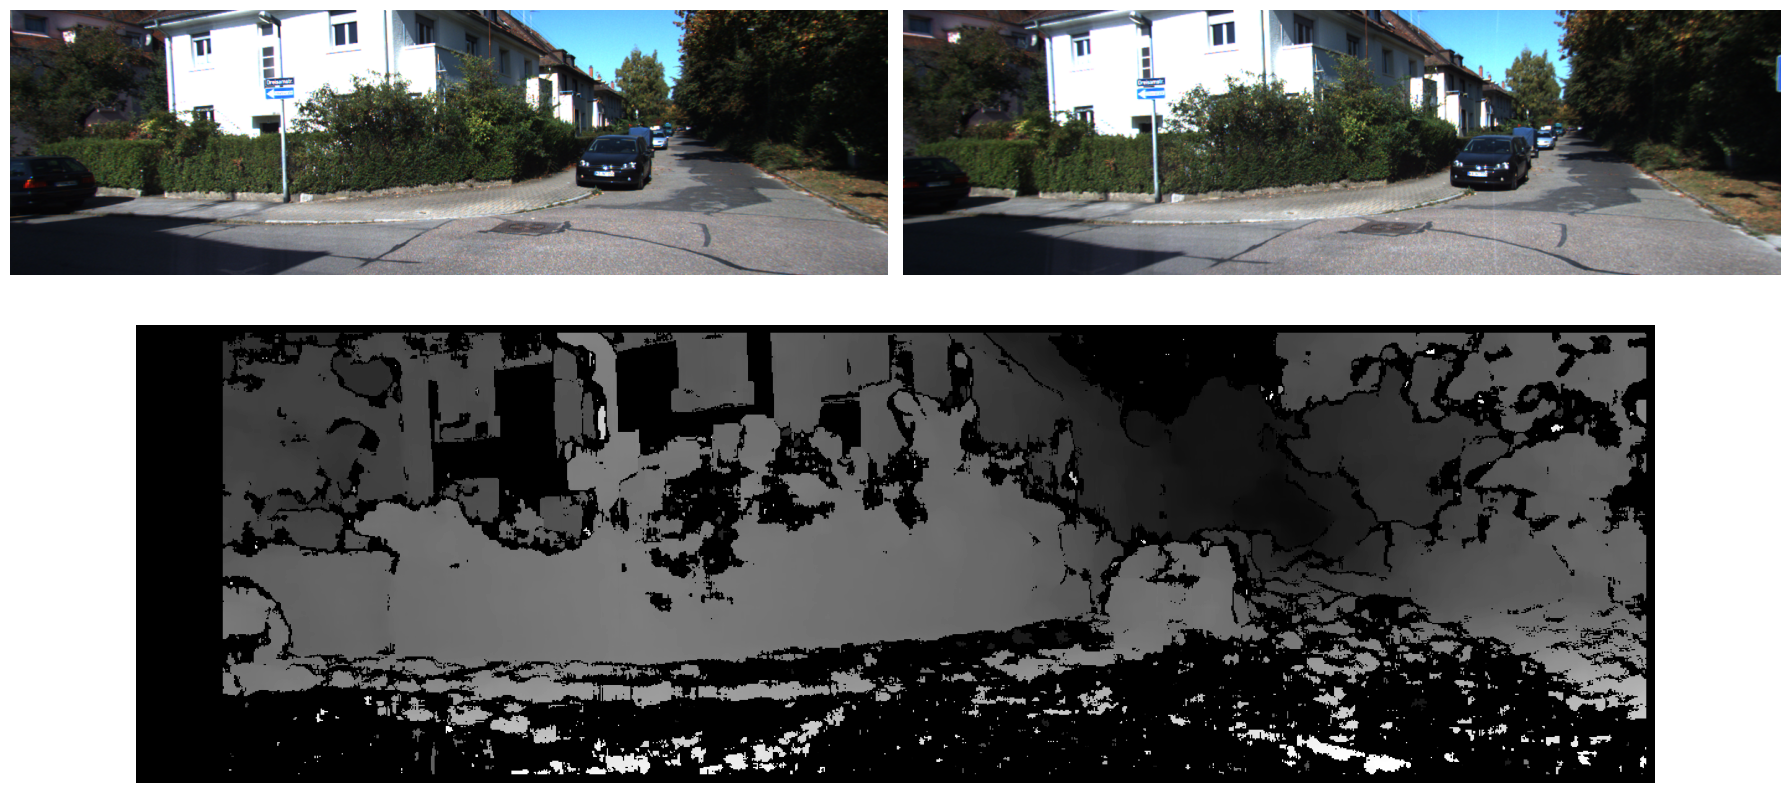

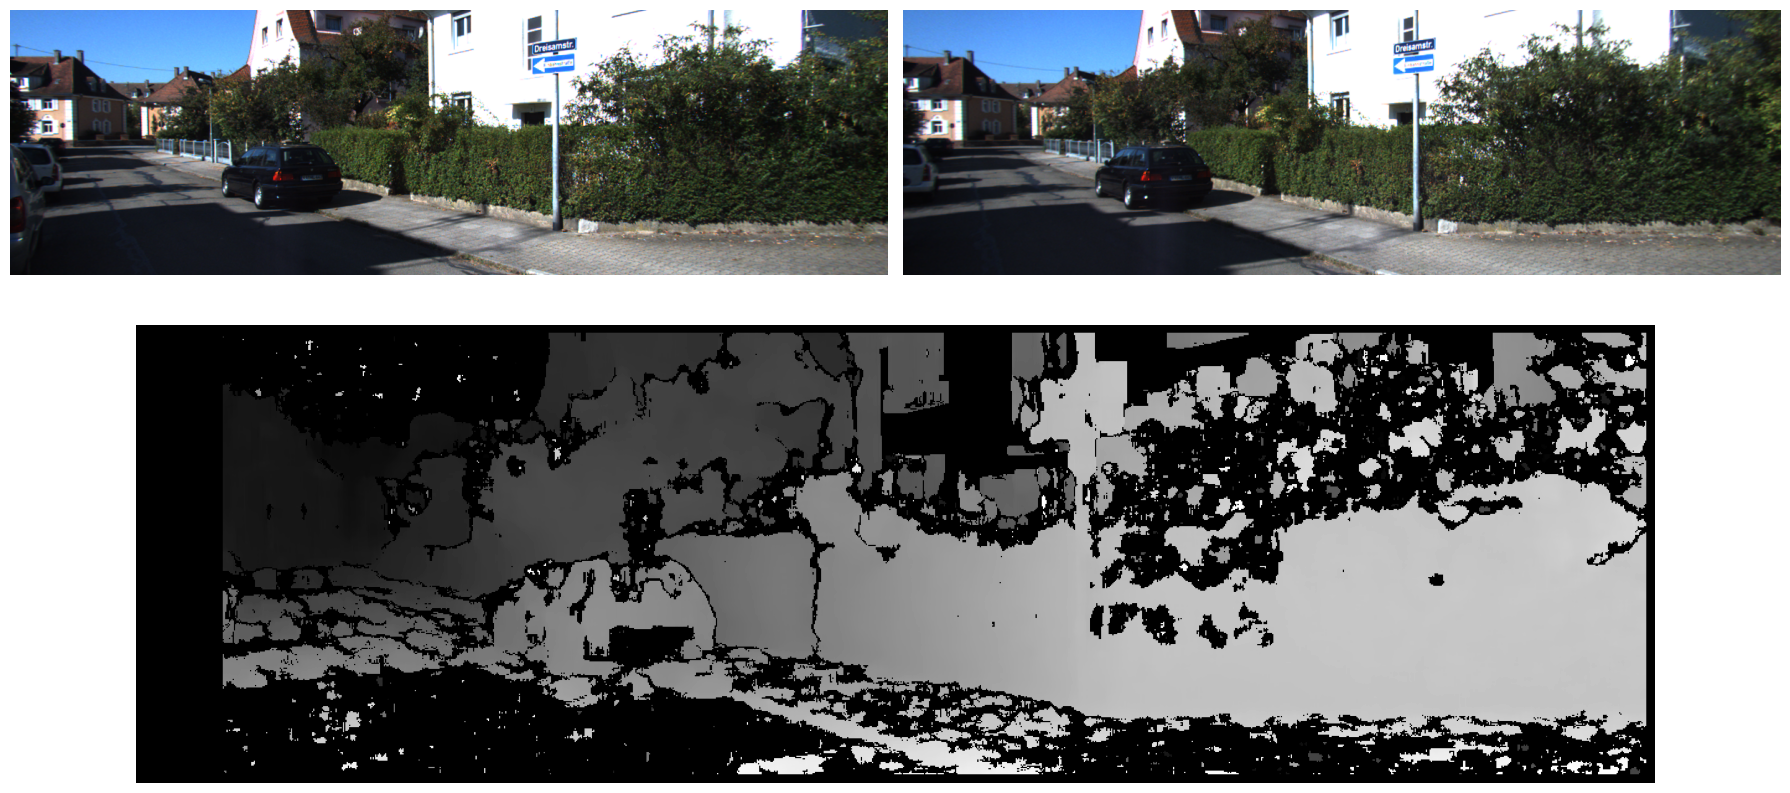

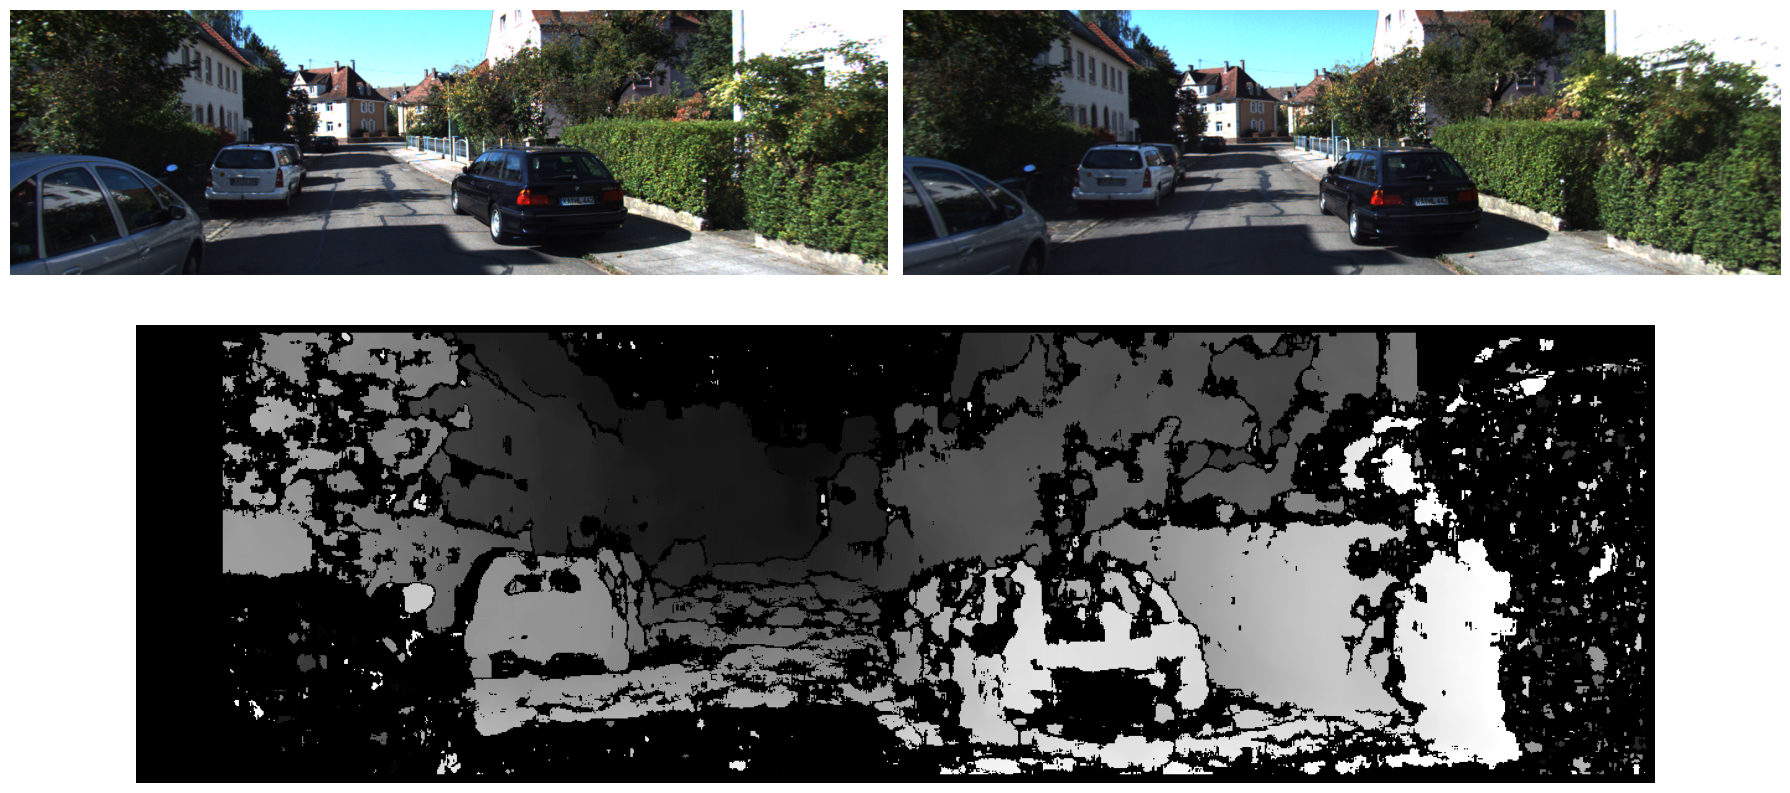

['StereoBM',
 'StereoBM_PREFILTER_NORMALIZED_RESPONSE',
 'StereoBM_PREFILTER_XSOBEL',
 'StereoBM_create',
 'StereoMatcher',
 'StereoMatcher_DISP_SCALE',
 'StereoMatcher_DISP_SHIFT',
 'StereoSGBM',
 'StereoSGBM_MODE_HH',
 'StereoSGBM_MODE_HH4',
 'StereoSGBM_MODE_SGBM',
 'StereoSGBM_MODE_SGBM_3WAY',
 'StereoSGBM_create']

In [5]:
# Visualize the images and the disparity map

i_value = [0,10,20]

for itr,i in enumerate(i_value):
    fig = plt.figure(figsize=(18, 9))
    plot_left_img = plt.subplot2grid((2, 2), (0, 0))
    l_img = plot_left_img.imshow(left_images[i][:,:,::-1])
    plt.axis('off')
    plot_right_img = plt.subplot2grid((2, 2), (0, 1))
    r_img = plot_right_img.imshow(right_images[i][:,:,::-1])
    plt.axis('off')
    plot_dmimg = plt.subplot2grid((2, 2), (1, 0), colspan=2)
    dm_img = plot_dmimg.imshow(np_disparity_maps[i], cmap="gray")
    plt.axis('off')
    fig.tight_layout()

    plt.show()

[elem for elem in dir(cv2) if "Stereo" in elem]

Task 2: Generate Colored Point Clouds

In [6]:
# Test the point cloud generation for one frame (LR pair)
k = 5  
height, width, _ = left_images[k].shape
focal_length = 7.070912e+02
baseline = 0.53790448812

Q_matrix = np.array([
    [baseline, 0, 0, -(width/2)*baseline],
    [0, baseline, 0, -(height/2)*baseline],
    [0, 0, 0, baseline*focal_length],
    [0, 0, 1, 0]
], np.float32)

normalized_disparity = (disparity_maps[k] - np.min(disparity_maps[k])) / np.ptp(disparity_maps[k])
normalized_disparity = (normalized_disparity * 255).astype(np.uint8)

points_3d = cv2.reprojectImageTo3D(normalized_disparity, Q_matrix)
flattened_points = points_3d.reshape(-1, 3)
finite_indices = np.all(np.isfinite(flattened_points), axis=1)
finite_points = flattened_points[finite_indices]

rotation_matrix = np.array([[0, 0, 1], [-1, 0, 0], [0, -1, 0]])
transformed_points = (rotation_matrix @ finite_points.T).T

left_image = left_images[k]
flattened_colors = left_image.reshape(-1, 3)
color_values = flattened_colors[finite_indices] / 255
color_values = color_values[:, [2, 1, 0]]  # BGR to RGB

In [7]:
# Visualize using Open3D
pcd = o3d.geometry.PointCloud()
cf = o3d.geometry.TriangleMesh.create_coordinate_frame(0.5)
pcd.points = o3d.utility.Vector3dVector(transformed_points)
pcd.colors = o3d.utility.Vector3dVector(color_values)
o3d.visualization.draw_geometries([pcd, cf], 
    window_name=f"Point Cloud - {k}", lookat=[0, 0, 0], up=[0, 0, 1], 
    front=[-1, -0.1, 0.25], zoom=0.01)

In [15]:
# from calib.txt we get the focal length and baseline
f = 7.070912e+02        
B = 0.53790448812     

reprojected_points_cam = []   # Raw points in camera frame (unfiltered)
finite_points_list = []    # Points in camera frame
rotated_points_list = []    # Points in standard frame
color_points_list = []  # RBG point colors
point_cloud_no_color_list = [] # As Open3D point clouds
point_cloud_color_list = []   # Colored Open3D point clouds

# Rotation matrix: Represent 'Camera' in 'Standard' frame
rotm = np.array([[0, 0, 1], [-1, 0, 0], [0, -1, 0]])

for image_index, disparity_map in enumerate(disparity_maps):
    height, width, _ = left_images[image_index].shape
    
    Q = np.array([[B, 0, 0, -(width/2)*B],
                  [0, B, 0, -(height/2)*B],
                  [0, 0, 0, B*f],
                  [0, 0, 1, 0]], np.float32)
    
    normalized_disparity = (((disparity_map - np.min(disparity_map)) / np.ptp(disparity_map)) * 255).astype(np.uint8)
    
    points = cv2.reprojectImageTo3D(normalized_disparity, Q)  
    points_flat = points.reshape(-1, 3) 
    
    left_image = left_images[image_index] 
    colors_flat = left_image.reshape(-1, 3)   
    colors_flat = colors_flat[:, [2, 1, 0]]   
    
    finite_indices = np.all(np.isfinite(points_flat), axis=1)
    finite_points = points_flat[finite_indices]  
    finite_colors = colors_flat[finite_indices]   
    
    rotated_points = (rotm @ finite_points.T).T    
    
    point_cloud_no_color = o3d.geometry.PointCloud()
    point_cloud_no_color.points = o3d.utility.Vector3dVector(rotated_points)
    
    point_cloud_color = o3d.geometry.PointCloud()
    point_cloud_color.points = o3d.utility.Vector3dVector(rotated_points)
    
    normalized_colors = finite_colors / 255  
    point_cloud_color.colors = o3d.utility.Vector3dVector(normalized_colors)
    
    reprojected_points_cam.append(copy.deepcopy(points))
    finite_points_list.append(copy.deepcopy(finite_points))
    rotated_points_list.append(copy.deepcopy(rotated_points))
    color_points_list.append(copy.deepcopy(finite_colors))
    point_cloud_no_color_list.append(copy.deepcopy(point_cloud_no_color))
    point_cloud_color_list.append(copy.deepcopy(point_cloud_color))


In [9]:
cf = o3d.geometry.TriangleMesh.create_coordinate_frame(0.5)
o3d.visualization.draw_geometries([point_cloud_color_list[0], cf],
    window_name="Point Cloud", lookat=[0, 0, 0], up=[0, 0, 1], 
    front=[-1, -0.1, 0.25], zoom=0.01)    

# Save as dict using pickle
file_name = "./../results/stereo/part1/raw_datadict.pkl"
save_file = False
data_obj = {
    "reprojected_points_cam": reprojected_points_cam,
    "finite_points_list": finite_points_list,
    "rotated_points_list": rotated_points_list,
    "color_points_list" : color_points_list
}
# If save
if save_file:
    with open(file_name, 'wb') as fhdlr:
        pickle.dump(data_obj, fhdlr)
else:
    print("Not saving pickle")


Not saving pickle


Task 3: Register Point Clouds in World

In [10]:
poses_file_path = "./data/3/poses.txt"
pose_data = np.loadtxt(poses_file_path, float)

# Convert each 3x4 matrix into a 4x4 homogeneous transformation matrix
homogeneous_transformations = np.array([np.vstack((rt.reshape(3, 4), [0, 0, 0, 1])) for rt in pose_data])


def visualize_odometry_poses(ht_poses):
    title = "Odometry Visualization"
    width, height = 1080, 720

    global_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=10.0, origin=[0, 0, 0])
    local_frame = o3d.geometry.TriangleMesh.create_coordinate_frame(size=5.0, origin=[0, 0, 0])

    vis = o3d.visualization.Visualizer()
    vis.create_window(title, width, height)
    vis.add_geometry(global_frame)  

    # Visualize each pose
    for ht in ht_poses:
        local_frame_copy = copy.deepcopy(local_frame).transform(ht)
        vis.add_geometry(local_frame_copy)
        vis.poll_events()
        vis.update_renderer()

    # Display the window
    vis.run()
    vis.destroy_window()

In [16]:
def inverse_transformation(homogeneous_transformation_matrix):
    R, p = homogeneous_transformation_matrix[:3, :3], homogeneous_transformation_matrix[:3, 3]
    inv_matrix = np.vstack((np.hstack((R.T, -(R.T @ p).reshape(-1, 1))), [0, 0, 0, 1]))
    return inv_matrix

tf_0_w = inverse_transformation(homogeneous_transformations[0])   
tfs_os = np.array([tf_0_w @ otf_w_i for otf_w_i in homogeneous_transformations])

tf_std_os = np.array([[0, 0, 1, 0], [-1, 0, 0, 0], [0, -1, 0, 0],
    [0, 0, 0, 1]])  
tf_io_so = inverse_transformation(tf_std_os)   
tfs_std = np.array([tf_std_os @ tf_os_i @  tf_io_so 
    for tf_os_i in tfs_os])

# Visualize the transforms from odometry
visualize_odometry_poses(homogeneous_transformations)

# Visualize the transforms (in the standard frame)
visualize_odometry_poses(tfs_std)

In [17]:
pts_af = [(tfs_std[i] @ np.hstack(   
        (rotated_points_list[i], np.ones((rotated_points_list[i].shape[0], 1)))
    ).T).T for i in range(0, tfs_std.shape[0])]    
pts_allframes = np.vstack(pts_af)[:, 0:3]
  
# All colors (vertically stacked)
pts_colors = np.vstack(color_points_list)

# Point clouds
fullpcd_color = o3d.geometry.PointCloud()
fullpcd_nocolor = o3d.geometry.PointCloud()
fullpcd_color.points = o3d.utility.Vector3dVector(pts_allframes)
fullpcd_nocolor.points = o3d.utility.Vector3dVector(pts_allframes)
fullpcd_color.colors = o3d.utility.Vector3dVector(pts_colors/255)

Task 4: Visualize Point Cloud

In [18]:
# Visualize the point cloud at 'i'th frame (in sequence)
i = 20
vpc = o3d.geometry.PointCloud()
vpc.points = o3d.utility.Vector3dVector(pts_af[i][:,:3])
vpc.colors = o3d.utility.Vector3dVector(color_points_list[i]/255)
cf = o3d.geometry.TriangleMesh.create_coordinate_frame(1)
cff = o3d.geometry.TriangleMesh.create_coordinate_frame(2)
cff.transform(tfs_std[i])
o3d.visualization.draw_geometries([vpc, cf, cff],
    window_name="Point Cloud", lookat=[0, 0, 0],
    up=[0, 0, 1], front=[-1, 0.2, 0.25], zoom=0.01, 
    width=1280, height=720)